In [2]:
!pip install pickle5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255318 sha256=790def3bb989391b7d86c57148d6d374a07f8bc76d81d6064f410203bdac17e0
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [5]:
!pip install keras

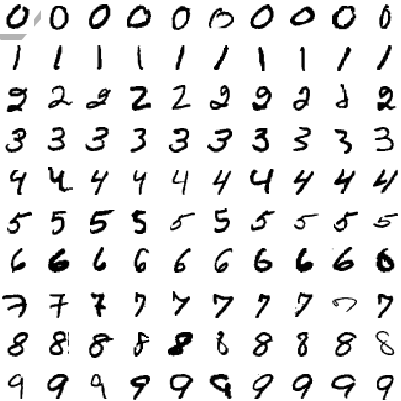

SS
sınıflandırma


ModuleNotFoundError: No module named 'keras.engine'

In [6]:
import cv2
import pickle
import numpy as np
import random
from keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow
from keras.models import load_model

image = cv2.imread("//content//drive//MyDrive//rcnn1//mnist.png")
cv2_imshow(image)

# ilklendir ss
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchQuality()

print("SS")
rects = ss.process()

proposals = []
boxes = []
output = image.copy()

for (x,y,w,h) in rects[:100]:

    color = [random.randint(0,255) for j in range(0,3)]
    cv2.rectangle(output, (x,y), (x+w,y+h),color, 2)

    roi = image[y:y+h,x:x+w]
    roi = cv2.resize(roi, dsize=(32,32), interpolation = cv2.INTER_LANCZOS4)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    roi = img_to_array(roi)

    proposals.append(roi)
    boxes.append((x,y,w+x,h+y))

proposals = np.array(proposals, dtype = "float64")
boxes = np.array(boxes, dtype = "int32")

print("sınıflandırma")
pickle_in = open("//content//drive//MyDrive//rcnn1//model_trained_v4.p", "rb")
model = pickle.load(pickle_in)
proba = model.predict(proposals)

number_list = []
idx = []
for i in range(len(proba)):

    max_prob = np.max(proba[i,:])
    if max_prob > 0.95:
        idx.append(i)
        number_list.append(np.argmax(proba[i]))

for i in range(len(number_list)):

    j = idx[i]
    cv2.rectangle(image, (boxes[j,0], boxes[j,1]), (boxes[j,2],boxes[j,3]),[0,0,255],2)
    cv2.putText(image, str(np.argmax(proba[j])),(boxes[j,0] + 5, boxes[j,1] +5 ), cv2.FONT_HERSHEY_COMPLEX,1.5,(0,255,0))

    cv2_imshow(image)
